In [77]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cmx

from scipy import stats

In [116]:
data_dir = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/'

cases = {}
cases['DDF'] = {}
cases['DDF'][0] = {'99.1SNIa0.9CART': 'CART 0.9',
                   '99.8SNIa0.2SNIa-91bg': 'SN-Ia-91bg 0.2',
                   '99.9SNIa0.1AGN': 'AGN 0.1'}
cases['DDF'][1] = {'99SNIa1SNII': 'SN-II 1',
                   '99SNIa1SNIbc': 'SN-Ibc 1',
                   '99SNIa1SNIax': 'SN-Iax 1'
                   }
cases['DDF'][2] = {'98SNIa2SNII': 'SN-II 2',
                   '98SNIa2SNIbc': 'SN-Ibc 2',
                   '98SNIa2SNIax': 'SN-Iax 2'
                   }
cases['DDF'][5] = {'95SNIa5SNII': 'SN-II 5',
                   '95SNIa5SNIbc': 'SN-Ibc 5',
                   '95SNIa5SNIax': 'SN-Iax 5'}
cases['DDF'][10] = {'90SNIa10SNII': 'SN-II 10',
                    '90SNIa10SNIax': 'SN-Iax 10'
                    }
cases['DDF'][25] = {'75SNIa25SNII': 'SN-II 25'}


cases['WFD'] = {}
cases['WFD'][0] = {'99.6SNIa0.4TDE': 'TDE 0.4',
                   '99.7SNIa0.3CART': 'CART 0.3'
                    }
cases['WFD'][1] = {'99SNIa1AGN': 'AGN 1',
                   '99SNIa1SNII': 'SN-II 1',
                   '99SNIa1SNIa-91bg': 'SN-Ia-91bg 1',
                   '99SNIa1SNIax': 'SN-Iax 1',
                    '99SNIa1SNIbc': 'SN-Ibc 1'
                   }
cases['WFD'][2] = {'98SNIa2AGN': 'AGN 2',
                   '98SNIa2SNII': 'SN-II 2',
                   '98SNIa2SNIa-91bg': 'SN-Ia-91bg 2',
                   '98SNIa2SNIax': 'SN-Iax 2',
                   '98SNIa2SNIbc': 'SN-Ibc 2'}
cases['WFD'][5] = {'95SNIa5AGN': 'AGN 5',
                   '95SNIa5SNII': 'SN-II 5',
                   '95SNIa5SNIa-91bg': 'SN-Ia-91bg 5',
                   '95SNIa5SNIax': 'SN-Iax 5',
                   '95SNIa5SNIbc': 'SN-Ibc 5'
                   }
cases['WFD'][10] = {'90SNIa10SNII': 'SN-II 10',
                    '90SNIa10SNIax': 'SN-Iax 10',
                    '90SNIa10SNIbc': 'SN-Ibc 10'
                    }
cases['WFD'][25] = { '75SNIa25SNII': 'SN-II 25',
                     '75SNIa25SNIax': 'SN-Iax 25'
                    }

all_shapes = {'SN-Ia-91bg': 'o',
              'SN-Iax': 's',
              'SN-II': 'd',
              'SN-Ibc': 'X',
              'AGN': '^',
              'CART': 'v',
               'TDE': '<'}

cdict = {'SN-Ia-91bg': 'red',
         'SN-Iax': 'green',
         'SN-II': 'blue',
         'SN-Ibc': 'purple',
         'AGN': 'brown',
         'CART': 'orange',
         'TDE': 'black'}

In [117]:
data_dir = '/media/RESSPECT/data/PLAsTiCC/for_metrics/final_data/'


posteriors = {}
density = {}
for field in ['DDF', 'WFD']:
    
    density[field] = {}
    posteriors[field] = {}
    
    for cont  in cases[field].keys():
        posteriors[field][cont] = {}
        density[field][cont] = {}
    
        for case in cases[field][cont].keys():        
            posteriors[field][cont][case] = pd.read_csv(data_dir + field + \
                                                '/v1/posteriors/csv/chains_' + case + \
                                                    '_lowz_withbias.csv')    
            
            density[field][cont][case] = stats.kde.gaussian_kde(posteriors[field][cont][case]['w'], 
                                                                      bw_method=0.3)

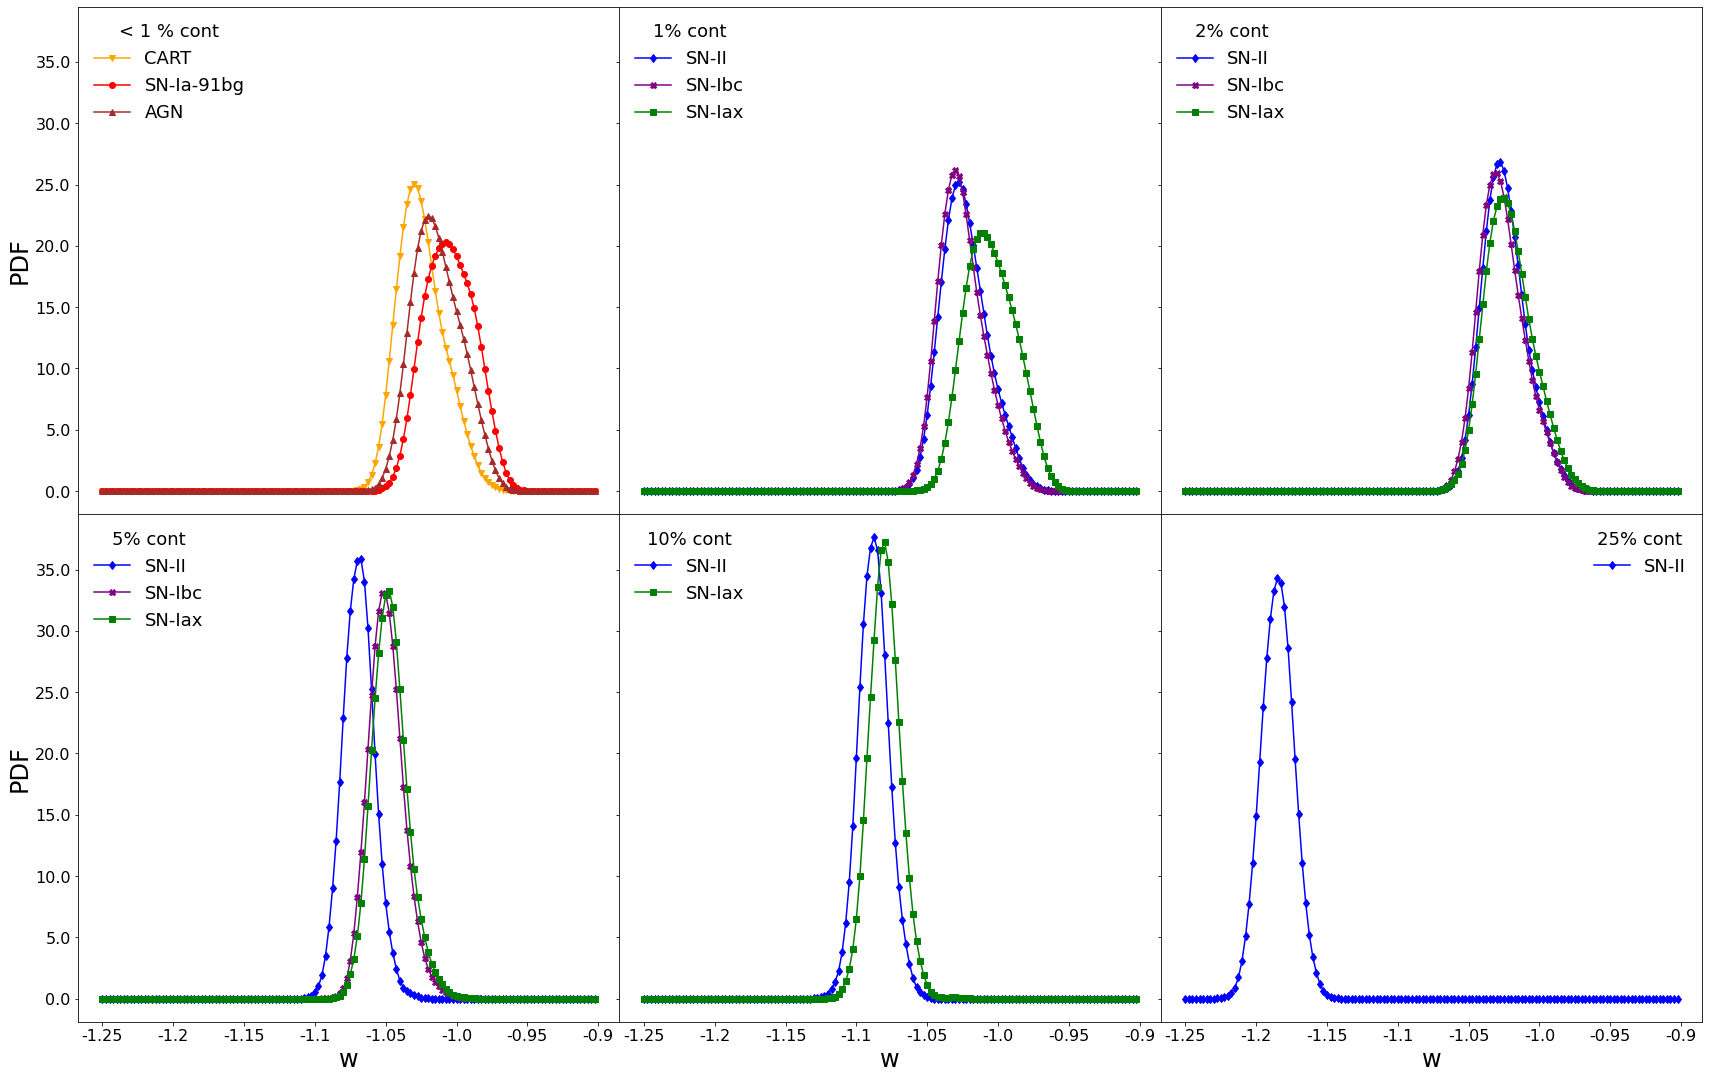

In [127]:
plt.rcParams['legend.title_fontsize'] = 18
plot_field = 'DDF'
conts = list(density[plot_field].keys())

x = np.arange(-1.25, -0.9, .0025)

f, axs = plt.subplots(2, 3, figsize=(24,15), sharex=True, sharey=True)

axs = axs.reshape(-1,1).flatten()

for i in range(6):    
    for case in density[plot_field][conts[i]].keys():
        
        case_temp = cases[plot_field][conts[i]][case]
        rad = case_temp[:case_temp.index(' ')]
        m = all_shapes[rad]
        axs[i].plot(x, density[plot_field][conts[i]][case](x), color=cdict[rad], marker=m, 
                    label=rad)
        
    ## remove axis ticks
    if i in [0,3]:
        axs[i].set_ylabel('PDF', fontsize=24)
        axs[i].set_yticklabels(axs[i].get_yticks(), fontsize=16)
        
    if i in [3,4,5]:
        axs[i].set_xlabel('w', fontsize=24)
        axs[i].set_xticklabels(axs[i].get_xticks(), fontsize=16)

    if i == 0:
        leg_title = '< 1 % cont'
    else:
        leg_title = str(conts[i]) + '% cont'
        
    if rad == 'SN-II' and conts[i] == 25:
        loc = 'upper right'
    else:
        loc = 'upper left'
    
    axs[i].legend(fontsize=18, frameon=False, title=leg_title, loc=loc)
    

plt.subplots_adjust(wspace=0.0001, hspace=0.0001, top=0.99, left=0.05, right=0.99, bottom=0.05)
plt.savefig(plot_field + 'combos.png')